In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
df = pd.read_csv("/content/DailyDelhiClimateTrain.csv")

In [3]:
df = pd.read_csv("DailyDelhiClimateTrain.csv")
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

ts = df['meantemp']

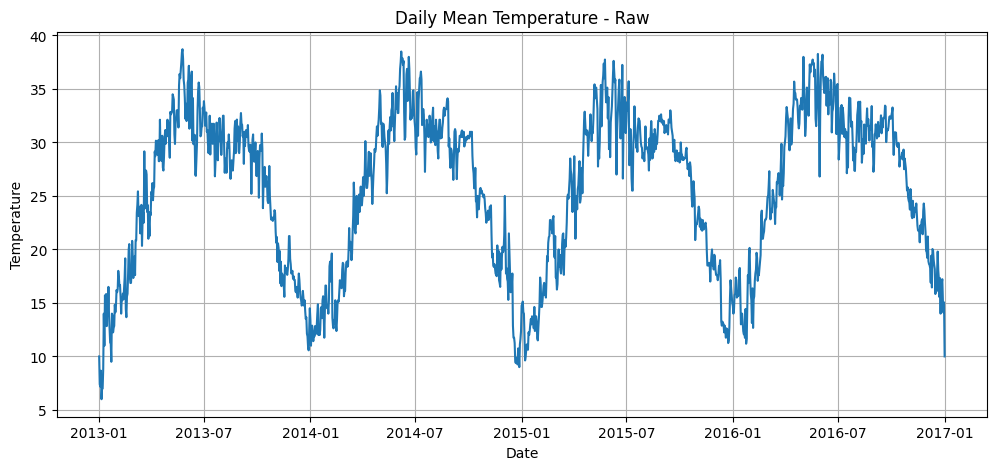

In [4]:
plt.figure(figsize=(12,5))
plt.plot(ts)
plt.title("Daily Mean Temperature - Raw")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.grid(True)
plt.show()

In [5]:
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    for key, value in result[4].items():
        print('Critical Value (%s): %.3f' % (key, value))

adf_test(ts)


ADF Statistic: -2.021069055920673
p-value: 0.2774121372301602
Critical Value (1%): -3.435
Critical Value (5%): -2.864
Critical Value (10%): -2.568


In [6]:
ts_diff = ts.diff().dropna()

<Figure size 1200x400 with 0 Axes>

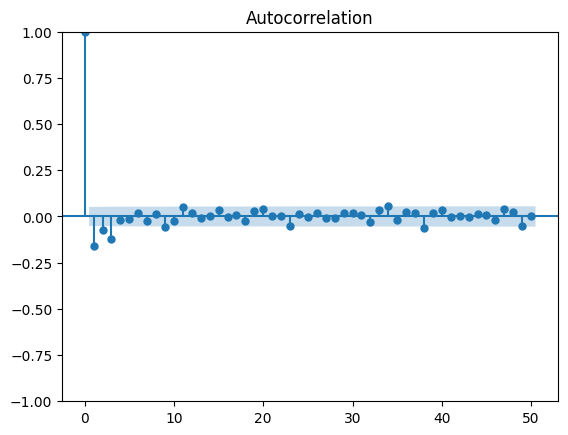

<Figure size 1200x400 with 0 Axes>

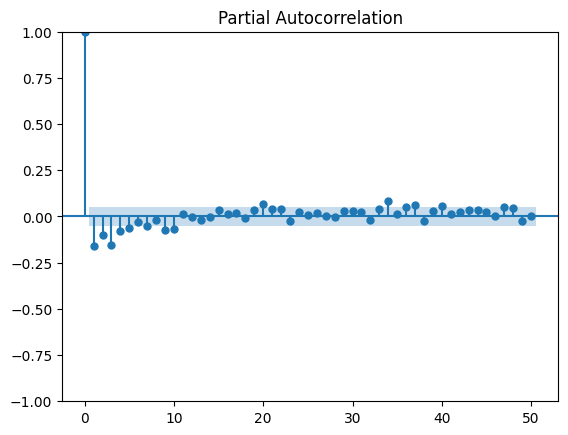

In [7]:
plt.figure(figsize=(12,4))
plot_acf(ts_diff, lags=50)
plt.show()

plt.figure(figsize=(12,4))
plot_pacf(ts_diff, lags=50)
plt.show()